## **Goals**
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config


df =pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [5]:
df.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [6]:
VehicleDataDesc=[]

for i in df.columns:
    VehicleDataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=VehicleDataDesc,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])

,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[144681, 318928]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[60, 55]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[23.0, 11.0]"
5,Previously_Insured,int64,0,0.0,2,"[0, 1]"
6,Vehicle_Age,object,0,0.0,3,"[< 1 Year, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,float64,0,0.0,48838,"[53773.0, 24711.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[25.0, 29.0]"


In [7]:
pd.crosstab(index=df['Response'],columns='count',normalize=True)*100

# 1 : Customer is interested

# 0 : Customer is not interested

col_0,count
Response,
0,87.743664
1,12.256336


Since 0>80%, we can assume this is imbalance data

In [8]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [9]:
#DROP Unessecary columns

df.drop(columns=['id','Region_Code'],inplace=True)

# Do Features affect response of vehicle's insurance?

In [18]:
df.corr().T

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_encoded,Vehicle_Age_encoded,Vehicle_Damage_encoded
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368,0.000999,-0.001345,-0.001507
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147,0.145545,-0.522300,0.267534
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155,-0.018374,0.030173,-0.016622
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570,0.000604,-0.027840,0.028235
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170,-0.081932,0.174783,-0.824143
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,0.003673,0.023656,0.009349
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042,-0.111159,0.388551,-0.224377
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050,-0.002517,0.002484,-0.002064
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,0.052440,-0.104078,0.354400
Gender_encoded,0.000999,0.145545,-0.018374,0.000604,-0.081932,0.003673,-0.111159,-0.002517,0.052440,1.000000,-0.112625,0.091606


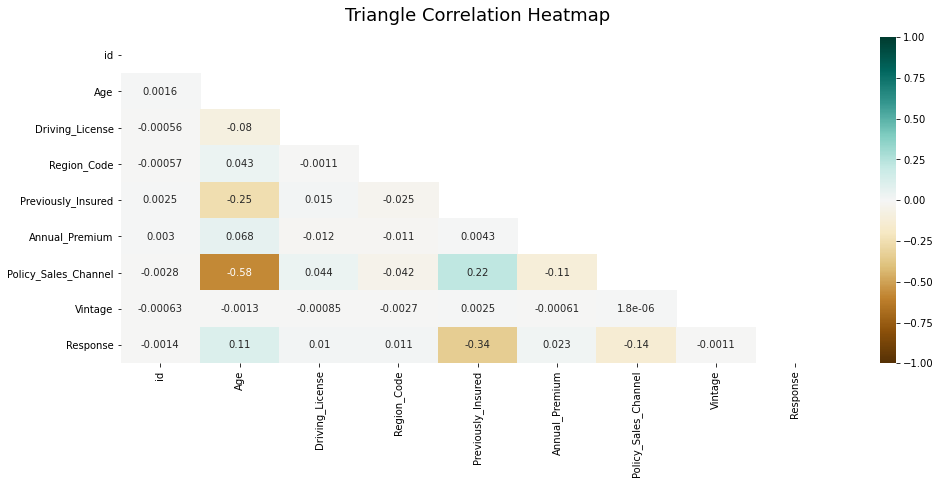

In [11]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Label Encoding 

### Gender, Vehicle Age, Vehicle Damage

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


le = LabelEncoder()

cat_cols = [i for i in df.columns if df[i].dtype == 'object']

for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    df[col_name_encoded] = le.fit_transform(df[col_name])
    df = df.drop(columns=[col_name])
    
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_encoded,Vehicle_Age_encoded,Vehicle_Damage_encoded
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,2,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,2,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0


## Target Engineering

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,roc_auc_score, recall_score, precision_score, accuracy_score

from sklearn.utils import resample

In [23]:
X = df.drop(columns=['Response'])
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = .8, random_state=42)

print('Train: ', X_train.shape)
print('Test: ',X_test.shape)

Train:  (304887, 11)
Test:  (76222, 11)


In [27]:
df_train = pd.concat([X_train, y_train], axis=1)

df_train['Response'].value_counts()

neg_response = df_train[df_train['Response'] == 0] ##  Majority class
response = df_train[df_train['Response'] == 1] ##  Minority class

## Handling Imbalanced Data

### Random Oversampling 

In [28]:
response_oversample = resample(response, ## Minority
                           replace=True,
                           n_samples = len(neg_response), ## Sum of Majority class
                           random_state = 42)

df_OverSampled = pd.concat([neg_response, response_oversample])

df_OverSampled['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [30]:
X_train_OverSampled = df_OverSampled.drop(columns=['Response'])
y_train_OverSampled = df_OverSampled['Response']

# Model Building

## KNN - Classifier

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     66880
           1       0.12      0.32      0.18      9342

    accuracy                           0.64     76222
   macro avg       0.50      0.50      0.47     76222
weighted avg       0.79      0.64      0.70     76222



acc score:  0.6398283960011545
recall score:  0.3215585527724256
precission score:  0.12454911065964593
f1 score:  0.17955231463494817


train accuracy KNN base:  0.8032844955672102
test accuracy KNN base:  1.0


       Pred 1  Pred 0
Akt 1    3004    6338
Akt 0   21115   45765


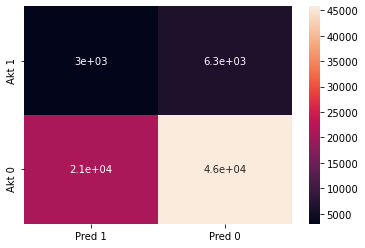

In [31]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_OverSampled, y_train_OverSampled)

KNN_predict = KNN.predict(X_test)

print(classification_report(y_test, KNN_predict))

acc_base_KNN = accuracy_score(y_test, KNN_predict)
recall_base_KNN = recall_score(y_test, KNN_predict)
precission_base_KNN = precision_score(y_test, KNN_predict)
f1_base_KNN = f1_score(y_test, KNN_predict)


print('\n\nacc score: ', acc_base_KNN)
print('recall score: ', recall_base_KNN)
print('precission score: ', precission_base_KNN)
print('f1 score: ', f1_base_KNN)

print('\n\ntrain accuracy KNN base: ', KNN.score(X_train, y_train))
print('test accuracy KNN base: ', KNN.score(X_test, KNN_predict))
print()
print()

KNN_CM = confusion_matrix(y_test, KNN_predict, labels=[1 , 0])
print(pd.DataFrame(data=KNN_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

KNN_DF = pd.DataFrame(data=KNN_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(KNN_DF, annot=True)
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.65      0.75     66880
           1       0.17      0.51      0.25      9342

    accuracy                           0.63     76222
   macro avg       0.54      0.58      0.50     76222
weighted avg       0.81      0.63      0.69     76222



acc score:  0.6301461520295978
recall score:  0.5148790408906015
precission score:  0.1689557062067512
f1 score:  0.2544233159662532


train accuracy LogReg base:  0.6299842236631933
test accuracy LogReg base:  1.0


       Pred 1  Pred 0
Akt 1    4810    4532
Akt 0   23659   43221


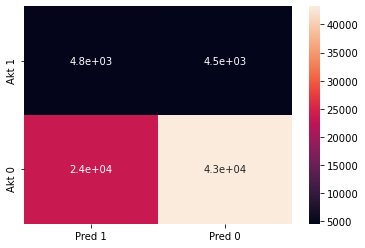

In [32]:
LogReg = LogisticRegression()

LogReg.fit(X_train_OverSampled, y_train_OverSampled)

LogReg_predict = LogReg.predict(X_test)

print(classification_report(y_test, LogReg_predict))

acc_base_LogReg = accuracy_score(y_test, LogReg_predict)
recall_base_LogReg = recall_score(y_test, LogReg_predict)
precission_base_LogReg= precision_score(y_test, LogReg_predict)
f1_base_LogReg = f1_score(y_test, LogReg_predict)


print('\n\nacc score: ', acc_base_LogReg)
print('recall score: ', recall_base_LogReg)
print('precission score: ', precission_base_LogReg)
print('f1 score: ', f1_base_LogReg)

print('\n\ntrain accuracy LogReg base: ', LogReg.score(X_train, y_train))
print('test accuracy LogReg base: ', LogReg.score(X_test, LogReg_predict))
print()
print()

LogReg_CM = confusion_matrix(y_test, LogReg_predict, labels=[1 , 0])
print(pd.DataFrame(data=LogReg_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

LogReg_DF = pd.DataFrame(data=LogReg_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(LogReg_DF, annot=True)
plt.show()

## Decission Tree Classifier

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.30      0.29      0.29      9342

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



acc score:  0.8287764687360605
recall score:  0.28655534146863626
precission score:  0.2953768067968664
f1 score:  0.2908992121706058


train accuracy DT base:  0.6299842236631933
test accuracy DT base:  0.6281126184041352


       Pred 1  Pred 0
Akt 1    2677    6665
Akt 0    6386   60494


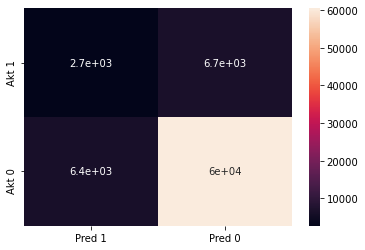

In [35]:
DT = DecisionTreeClassifier()

DT.fit(X_train_OverSampled, y_train_OverSampled)

DT_predict = DT.predict(X_test)

print(classification_report(y_test, DT_predict))

acc_base_DT = accuracy_score(y_test, DT_predict)
recall_base_DT = recall_score(y_test, DT_predict)
precission_base_DT= precision_score(y_test, DT_predict)
f1_base_DT = f1_score(y_test, DT_predict)


print('\n\nacc score: ', acc_base_DT)
print('recall score: ', recall_base_DT)
print('precission score: ', precission_base_DT)
print('f1 score: ', f1_base_DT)

print('\n\ntrain accuracy DT base: ', LogReg.score(X_train, y_train))
print('test accuracy DT base: ', LogReg.score(X_test, DT_predict))
print()
print()

DT_CM = confusion_matrix(y_test, DT_predict, labels=[1 , 0])
print(pd.DataFrame(data=DT_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

DT_DF = pd.DataFrame(data=DT_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(DT_DF, annot=True)
plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     66880
           1       0.36      0.23      0.28      9342

    accuracy                           0.86     76222
   macro avg       0.63      0.59      0.60     76222
weighted avg       0.83      0.86      0.84     76222



acc score:  0.8566686783343391
recall score:  0.22554056947120532
precission score:  0.3634638606175608
f1 score:  0.27835392033819933


train accuracy RF base:  0.9999278421185555
test accuracy RF base:  1.0


       Pred 1  Pred 0
Akt 1    2107    7235
Akt 0    3690   63190


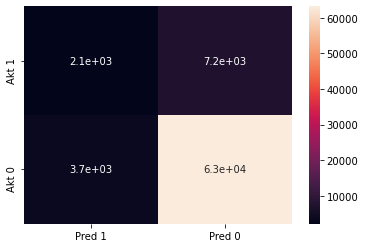

In [39]:
RF = RandomForestClassifier()

RF.fit(X_train_OverSampled, y_train_OverSampled)

RF_predict = RF.predict(X_test)

print(classification_report(y_test, RF_predict))

acc_base_RF = accuracy_score(y_test, RF_predict)
recall_base_RF = recall_score(y_test, RF_predict)
precission_base_RF = precision_score(y_test, RF_predict)
f1_base_RF = f1_score(y_test, RF_predict)


print('\n\nacc score: ', acc_base_RF)
print('recall score: ', recall_base_RF)
print('precission score: ', precission_base_RF)
print('f1 score: ', f1_base_RF)

print('\n\ntrain accuracy RF base: ', RF.score(X_train, y_train))
print('test accuracy RF base: ', RF.score(X_test, RF_predict))
print()
print()

RF_CM = confusion_matrix(y_test, RF_predict, labels=[1 , 0])
print(pd.DataFrame(data=RF_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"]))

RF_DF = pd.DataFrame(data=RF_CM, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(RF_DF, annot=True)
plt.show()

# SUMMARY

In [42]:
data = {
    "K Nearest Neighbors" : [acc_base_KNN, precission_base_KNN, recall_base_KNN, f1_base_KNN],
    "Logistic Regression" : [acc_base_LogReg, precission_base_LogReg, recall_base_LogReg, f1_base_LogReg],
    "Decission Tree" : [acc_base_DT, precission_base_DT, recall_base_DT, f1_base_DT],
    "Random Forest"  : [acc_base_RF, precission_base_RF, recall_base_RF, f1_base_RF]

}
pd.DataFrame(data=data, index=['Accuracy', 'Precission', 'Recall', 'F1 Score'])


,K Nearest Neighbors,Logistic Regression,Decission Tree,Random Forest
Accuracy,0.639828,0.630146,0.828776,0.856669
Precission,0.124549,0.168956,0.295377,0.363464
Recall,0.321559,0.514879,0.286555,0.225541
F1 Score,0.179552,0.254423,0.290899,0.278354


In order to solve this problem, we can use precission as our main parameter in terms of using models. According these applied models, we are using Random Forest.

# Export Model

In [44]:
import joblib

In [45]:
joblib.dump(RF,'Insurance Model')

['Insurance Model']